# Analise exploratória de carros a venda nos EUA

<div align="left">
<img src="https://github.com/HelderSCordeiro/EDA_CARS/assets/97766575/98da3284-5032-4a74-8ee7-288cbfe2b2e3" width="700px" />
</div>

# 1. Introdução

Automóvel (do grego αὐτός ["autós"], "por si próprio", e do latim mobilis, "mobilidade", como referência a um objeto responsável pela sua própria locomoção ou de outras pessoas em consoante) ou carro (das línguas celtas, através do latim carru)[1] é um veículo motorizado com rodas usado para transporte. Os carros entraram em uso global durante o século XX e as economias desenvolvidas dependem deles. O ano de 1886 é considerado como o ano de nascimento do carro moderno, quando o inventor alemão Karl Benz patenteou seu Benz Patent-Motorwagen.

Neste estudo iremos analisar os carros a venda nos Estados Unidos da América, os dados foram obtidos da AUCTION EXPORT.com, os mesmos contem 28 marcas de veiculos a venda no pais. Ele contem o preço, marca, cor, entre outros.


# 1.1. Objetivos

O objetivo deste estudo é realizar uma Análise Exploratória dos Dados do conjunto de dados US Cars Dataset, disponível em USA_cars_datasets.csv; a fim de caracterizar os carros a leilão nos EUA. Especificiamente serão respondidas as seguintes questões de pesquisa:

- Qual marca teve mais numero de vendas?
- Qual veiculo foi mais comprado?
- Quais modelos possuem maior faturamento?
- Qual ano possuem carros em melhores condições?
- Qual marca possui maior numero de carros em condições ruins?
- Quais caracteristicas tem uma melhor probabilidade de oferecer um carro em melhores condições?



# 2. Metodologia
Nesta seção será apresentado todo o processo de preparação, organização e limpeza de dados feito no dataset que possui os seguintes dados:


| Coluna            | Descrição                                | Tipo    |
|-------------------|------------------------------------------|-------- |
| Price             | Valor do veiculo a venda                 | Integer |
| Years             | Ano de registro do veiculo               | Integer |
| Brand             | Marca do carro                           | String  |
| Model             | Modelo do veiculo                        | String  |
| Color             | Cor do veiculo                           | String  |
| State/City        | Cidade onde o carro está localizado      | String  |
| Mileage           | Milhas percorridas pelo carro            | Float   |
| Vin               | Identificação númerica do veiculo        | integer |
| Title Status      | Classificação do veiculo                 | String  |
| Lot               | Numero de identificação do lote          | Integer |
| Condition         | Tempo                                    | String  |



## OBSERVAÇÕES

Title Status: clean vehicles e salvage insurance                         
Lot: é um numero atribuido a uma quantidade especifica de carros produzidos


# 2.1. Configuração do Ambiente

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(7,5)})

# 2.2. Leitura dos Dados

In [42]:
df = pd.read_csv('USA_cars_datasets.csv')

In [43]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,"274,117.00",black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,"190,552.00",silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,"39,590.00",silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,"64,146.00",blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,"6,654.00",red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [45]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,"2,499.00","2,499.00","2,499.00","2,499.00","2,499.00"
mean,"1,249.00","18,767.67","2,016.71","52,298.69","167,691,389.06"
std,721.54,"12,116.09",3.44,"59,705.52","203,877.21"
min,0.00,0.00,"1,973.00",0.00,"159,348,797.00"
25%,624.50,"10,200.00","2,016.00","21,466.50","167,625,331.00"
50%,"1,249.00","16,900.00","2,018.00","35,365.00","167,745,058.00"
75%,"1,873.50","25,555.50","2,019.00","63,472.50","167,779,772.00"
max,"2,498.00","84,900.00","2,020.00","1,017,936.00","167,805,500.00"


# 2.3. Organização e Limpeza dos Dados

## 2.3.1. Tranformando dados

In [46]:
df['year'] = df['year'].astype(int)

df['lot'] = df['lot'].astype(str)


#  2.3.2 Remoção de Colunas

Removendo as colunas:

Unnamed: 0, pois se trata de um index
vin, pois é uma identificação númerica sem utilidade

In [47]:
df.drop(columns=['Unnamed: 0','vin'], inplace=True)

2.3.3. Dados Ausentes

Não temos nenhum dado ausente

# 2.4. Mapeamento de Dados

# 2.5. Feature Engineering

# 3. Análise dos Dados

## 3.1. Qual marca teve mais numero de carros?

In [55]:
marca_maior = df.groupby(by='brand').aggregate({'price':'count'}).reset_index().rename(columns= {'price':'Qtd'}).sort_values('Qtd', ascending=False).head(10)

<AxesSubplot: xlabel='brand', ylabel='Qtd'>

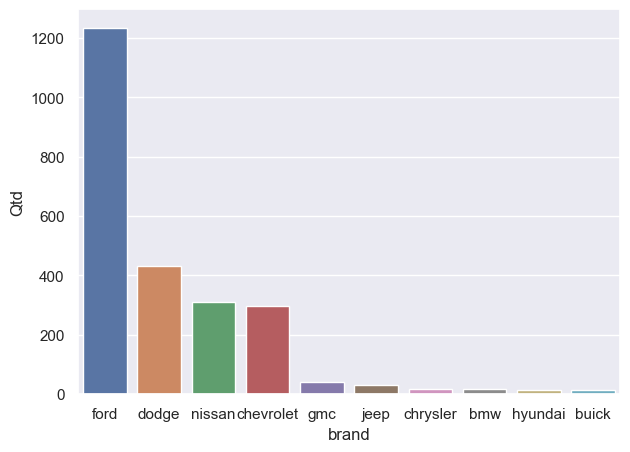

In [58]:
sns.barplot(x = marca_maior['brand'], y =marca_maior['Qtd'] )

Respostas: **Ford** e **Dodge**

## 3.2. Qual veiculo foi mais comprado?

In [59]:
df

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,"274,117.00",black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,"190,552.00",silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,"39,590.00",silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,"64,146.00",blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,"6,654.00",red,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,"23,609.00",red,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,"34,553.00",silver,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,"31,594.00",silver,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,"32,557.00",black,167762227,florida,usa,2 days left


<AxesSubplot: xlabel='model', ylabel='Qtd'>

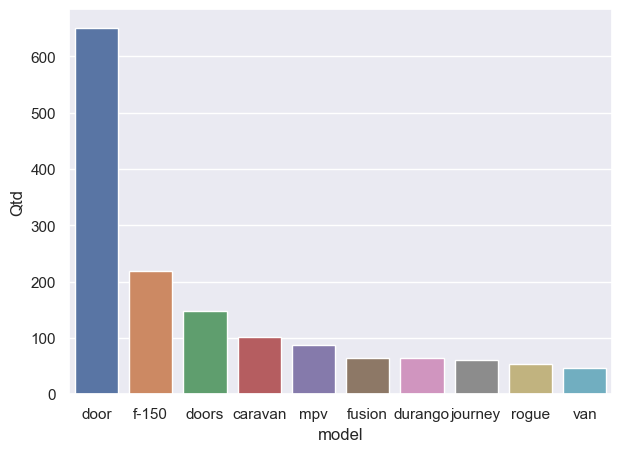

In [60]:
vei_maior = df.groupby(by='model').aggregate({'price':'count'}).reset_index().rename(columns= {'price':'Qtd'}).sort_values('Qtd', ascending=False).head(10)

sns.barplot(x = vei_maior['model'], y = vei_maior['Qtd'] )

Resposta: **door**

## 3.3. Quais anos tiveram maior numero de carros?

<AxesSubplot: xlabel='year', ylabel='Qtd'>

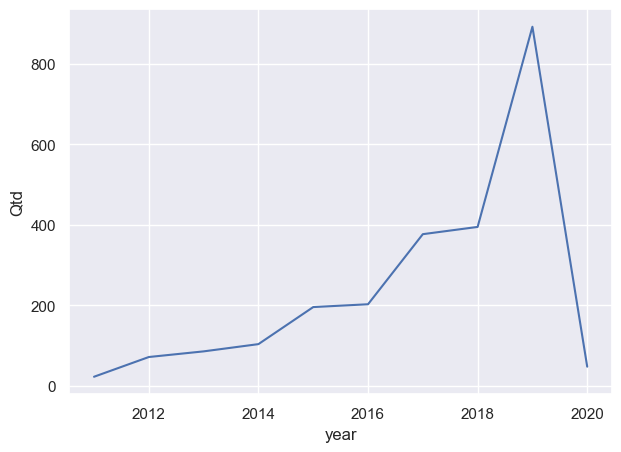

In [61]:
vei_maior = df.groupby(by='year').aggregate({'price':'count'}).reset_index().rename(columns= {'price':'Qtd'}).sort_values('Qtd', ascending=False).head(10)

sns.lineplot(x = vei_maior['year'], y = vei_maior['Qtd'] )

## 3.4. Qual ano possuem carros em melhores condições?

## 3.5. Qual marca possui maior numero de carros em condições ruins?

## 3.6. Quais caracteristicas tem uma melhor probabilidade de oferecer um carro em melhores condições?
